In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def calculateA(y):
    a = []
    for i in range(len(y)-1):
        a.append(y[i])  
    return a

def calculateB(y, h, c):
    b = []
    for i in range(len(y)-1):
        b_i = (y[i+1]-y[i])/(h[i])-(h[i]/3)*(c[i+1]+2*c[i])
        b.append(b_i)
        
    return b

def calculateC(x, h):
    c = []
    for i in range(1, len(x)-1):
        c_i = 3 * ((y[i+1]-y[i])/h[i]) - 3 * ((y[i]-y[i-1])/h[i-1])
        c.append(c_i) #z-values
    c_values = np.linalg.solve(setUpA(h), c)
    c = [0]
    for i in c_values:
        c.append(i)
    c.append(0)
    return c

def calculateD(h, c):
    d = []
    for i in range(len(c)-1):
        d.append((1/(3*h[i]))*(c[i+1]-c[i]))
    
    return d

def calculateH(x):
    h = []
    for i in range(len(x)-1):
        h_i = x[i+1] - x[i]
        h.append(h_i) 
    return h

#builds the matrix A for the equation A*c = z
def setUpA(h):
    dim = len(h)-1
    A = np.arange(dim*dim).reshape(dim, dim) * [0]
    s = np.arange(len(A))
    
    #sets the diagonal-elements of A
    hdiag = []
    for i in range(len(h)-1):
        hdiag.append(2*(h[i]+h[i+1]))
    np.fill_diagonal(A, hdiag)
    
    #sets the elements above and below the diagonal
    A[s[:-1], s[1:]] = h[:-2] 
    A[s[1:], s[:-1]] = h[:-2]
    
    return A

def calculateAll(x, y):
    a = calculateA(y)
    h = calculateH(x)
    c = calculateC(x, h)
    d = calculateD(h, c)
    b = calculateB(y, h, c)
        
    return a, b, c, d, h

def calculateS(x, y):
    components = calculateAll(x, y)
    
    dim = len(x)-1
    #all polynoms are of fourth order
    S = np.arange(4*(dim)).reshape(4, dim) * [0.]
    S[0] = components[0]
    S[1] = components[1]
    S[2] = components[2][:-1]
    S[3] = components[3]
    S = np.hsplit(S, len(x)-1)
    polynomials = []
    
    for i in range(len(S)):
        polynomials.append(np.poly1d(np.flipud((S[i].reshape(4)))))
    
    return polynomials

def printComponents(x, y):
    print(calculateAll(x, y))
    print(calculateS(x, y))

def IT21_ZH04_S5_Aufg2(x, y, xx):
    yy = []
    splicePolynoms = calculateS(x, y)
   
    for k in range(len(xx)):
        for j in range(len(x)):
            if xx[k] >= x[j] and xx[k] <= x[j+1]:
                yy.append(np.polyval(splicePolynoms[j], xx[k]-x[j]))
                break
                
    return yy

In [24]:
x = np.array([0, 1, 2, 3])
y = np.array([2, 1, 2, 2])

calculateS(x, y)
printComponents(x, y)

([2, 1, 2], [-1.6, 0.19999999999999996, 0.7999999999999999], [0, 1.8, -1.2, 0], [0.6, -1.0, 0.39999999999999997], [1, 1, 1])
[poly1d([ 0.6,  0. , -1.6,  2. ]), poly1d([-1. ,  1.8,  0.2,  1. ]), poly1d([ 0.4, -1.2,  0.8,  2. ])]


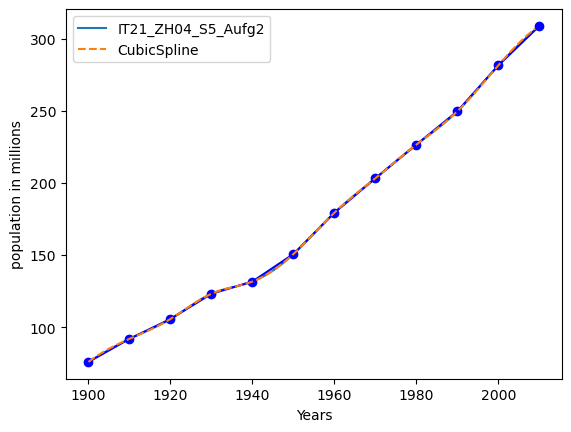

In [22]:
x = np.array([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010])
y = np.array([75.995, 91.972, 105.711, 123.203, 131.669, 150.697, 179.323, 203.212, 226.505, 249.633, 281.422, 308.745])

xx = np.arange(1900, 2010)
cs = CubicSpline(x, y)
 
IT21_ZH04_S5_Aufg2(x, y, xx)

plt.plot(xx, IT21_ZH04_S5_Aufg2(x, y, xx), label="IT21_ZH04_S5_Aufg2")
plt.plot(x, y, color='blue', marker='o')
plt.plot(xx, cs(xx), linestyle='dashed', label="CubicSpline")
plt.xlabel("Years")
plt.ylabel("population in millions")
plt.legend(loc='upper left')